# Logistic Regression

### 1. Data Exploration
a. Load the dataset and perform exploratory data analysis (EDA).

In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

# Display the first few rows of the training data
train_df.head()

# Display basic information about the training dataset
train_df.info()

# Display summary statistics of the training dataset
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### b. Examine the features, their types, and summary statistics.

In [2]:
# Display the data types of each column
print(train_df.dtypes)

# Check for missing values
train_df.isnull().sum()


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### c. Create visualizations to visualize the distributions and relationships between features.


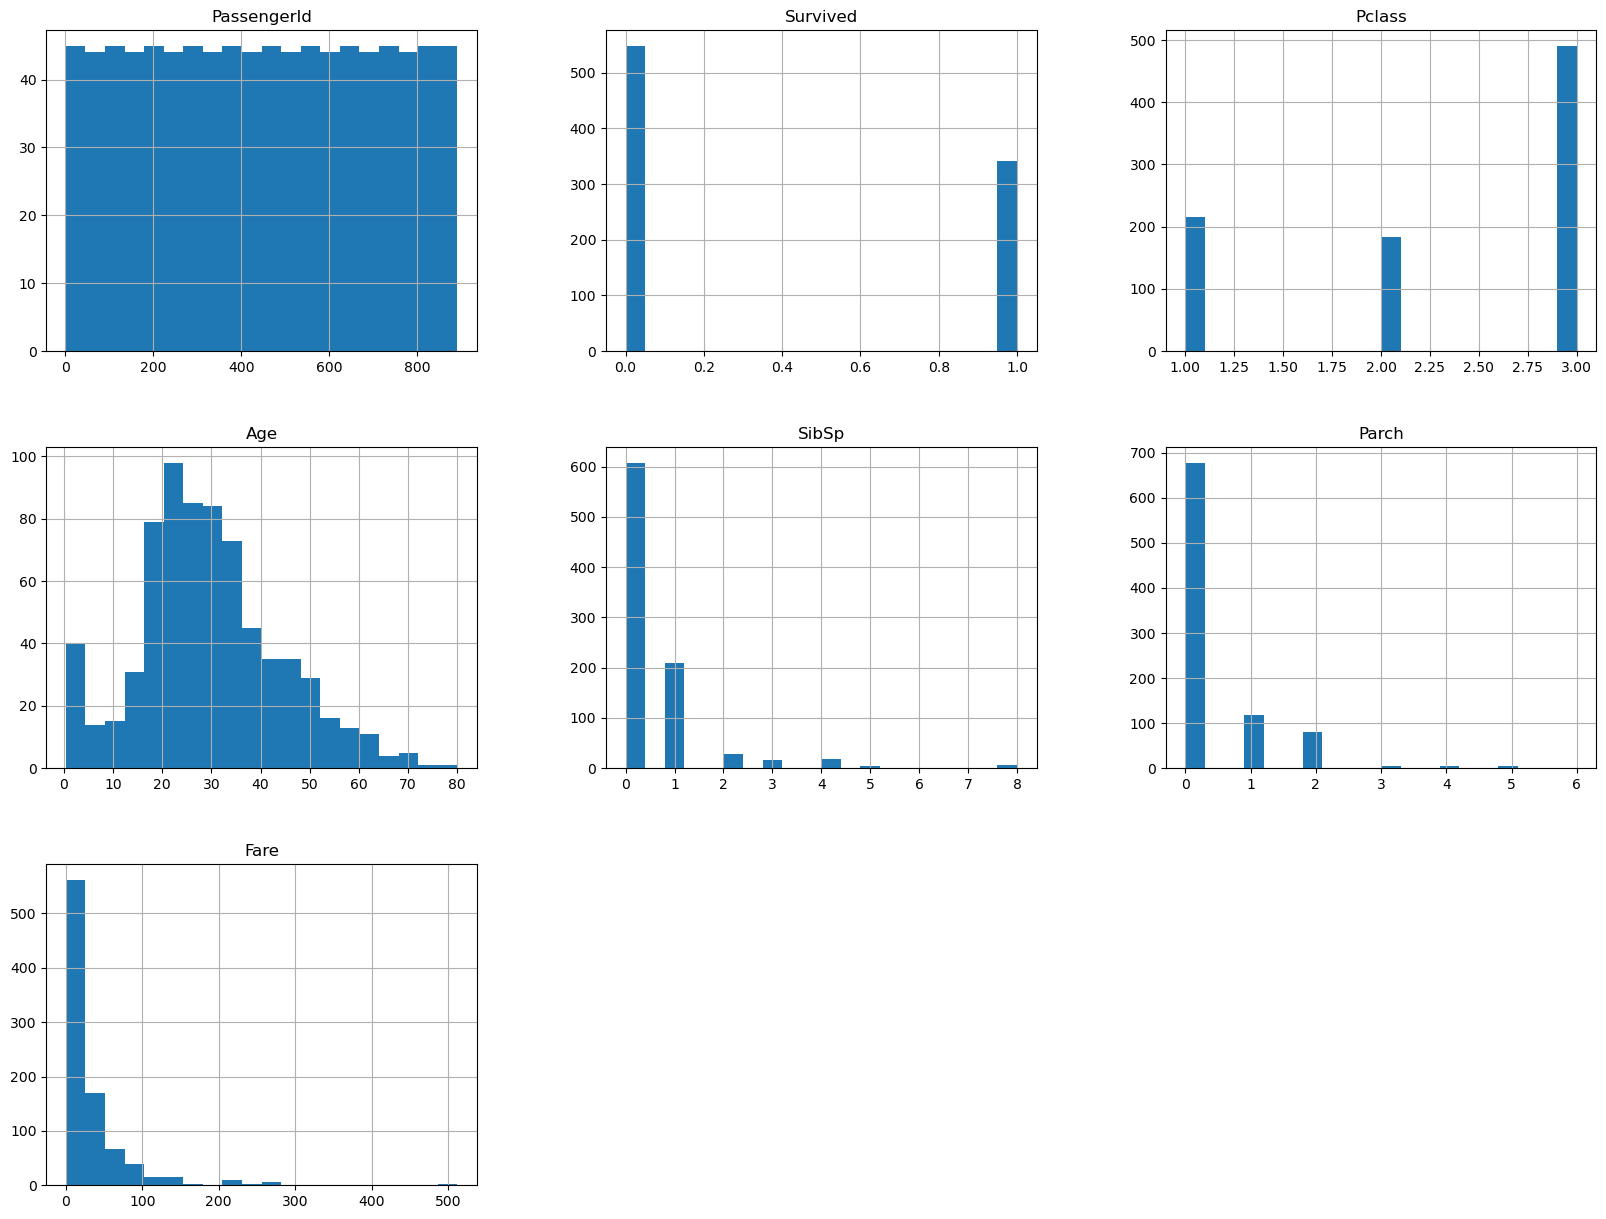

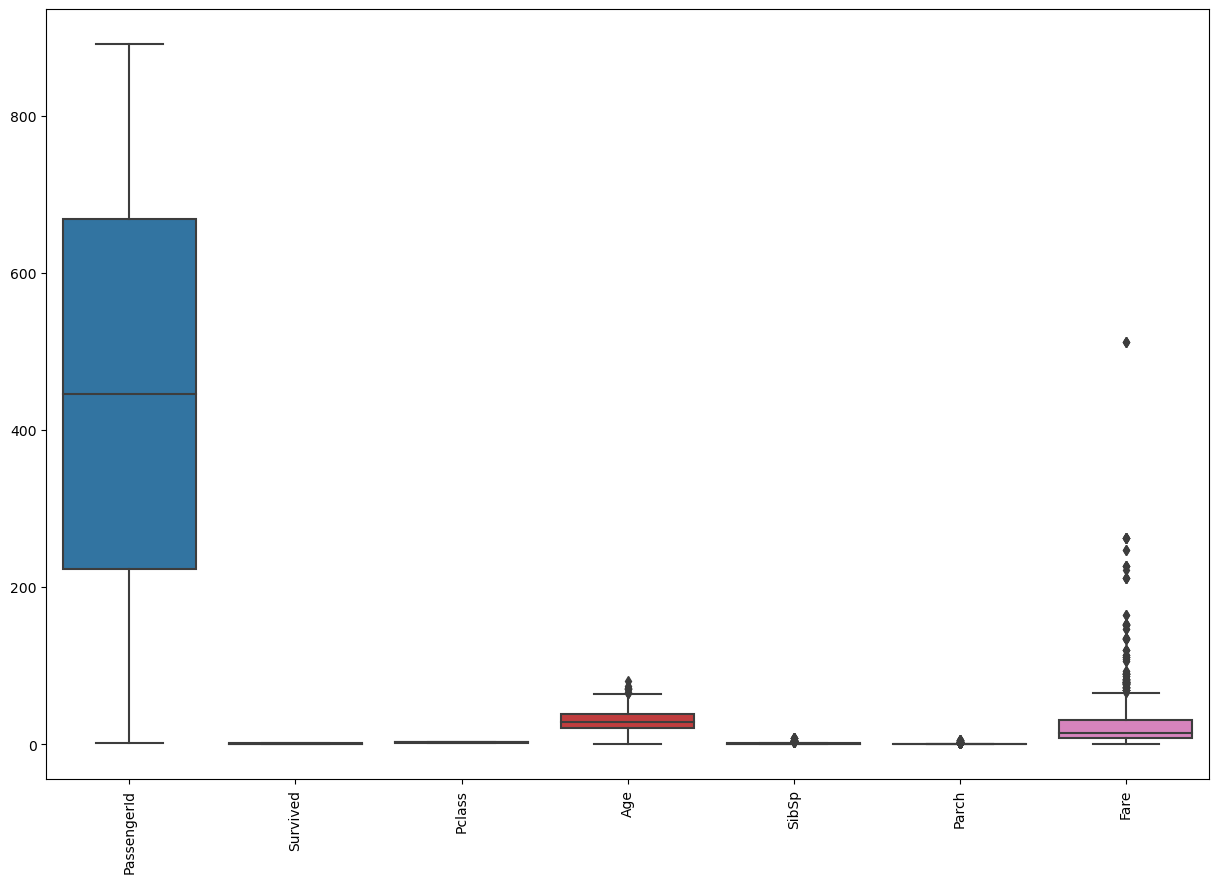

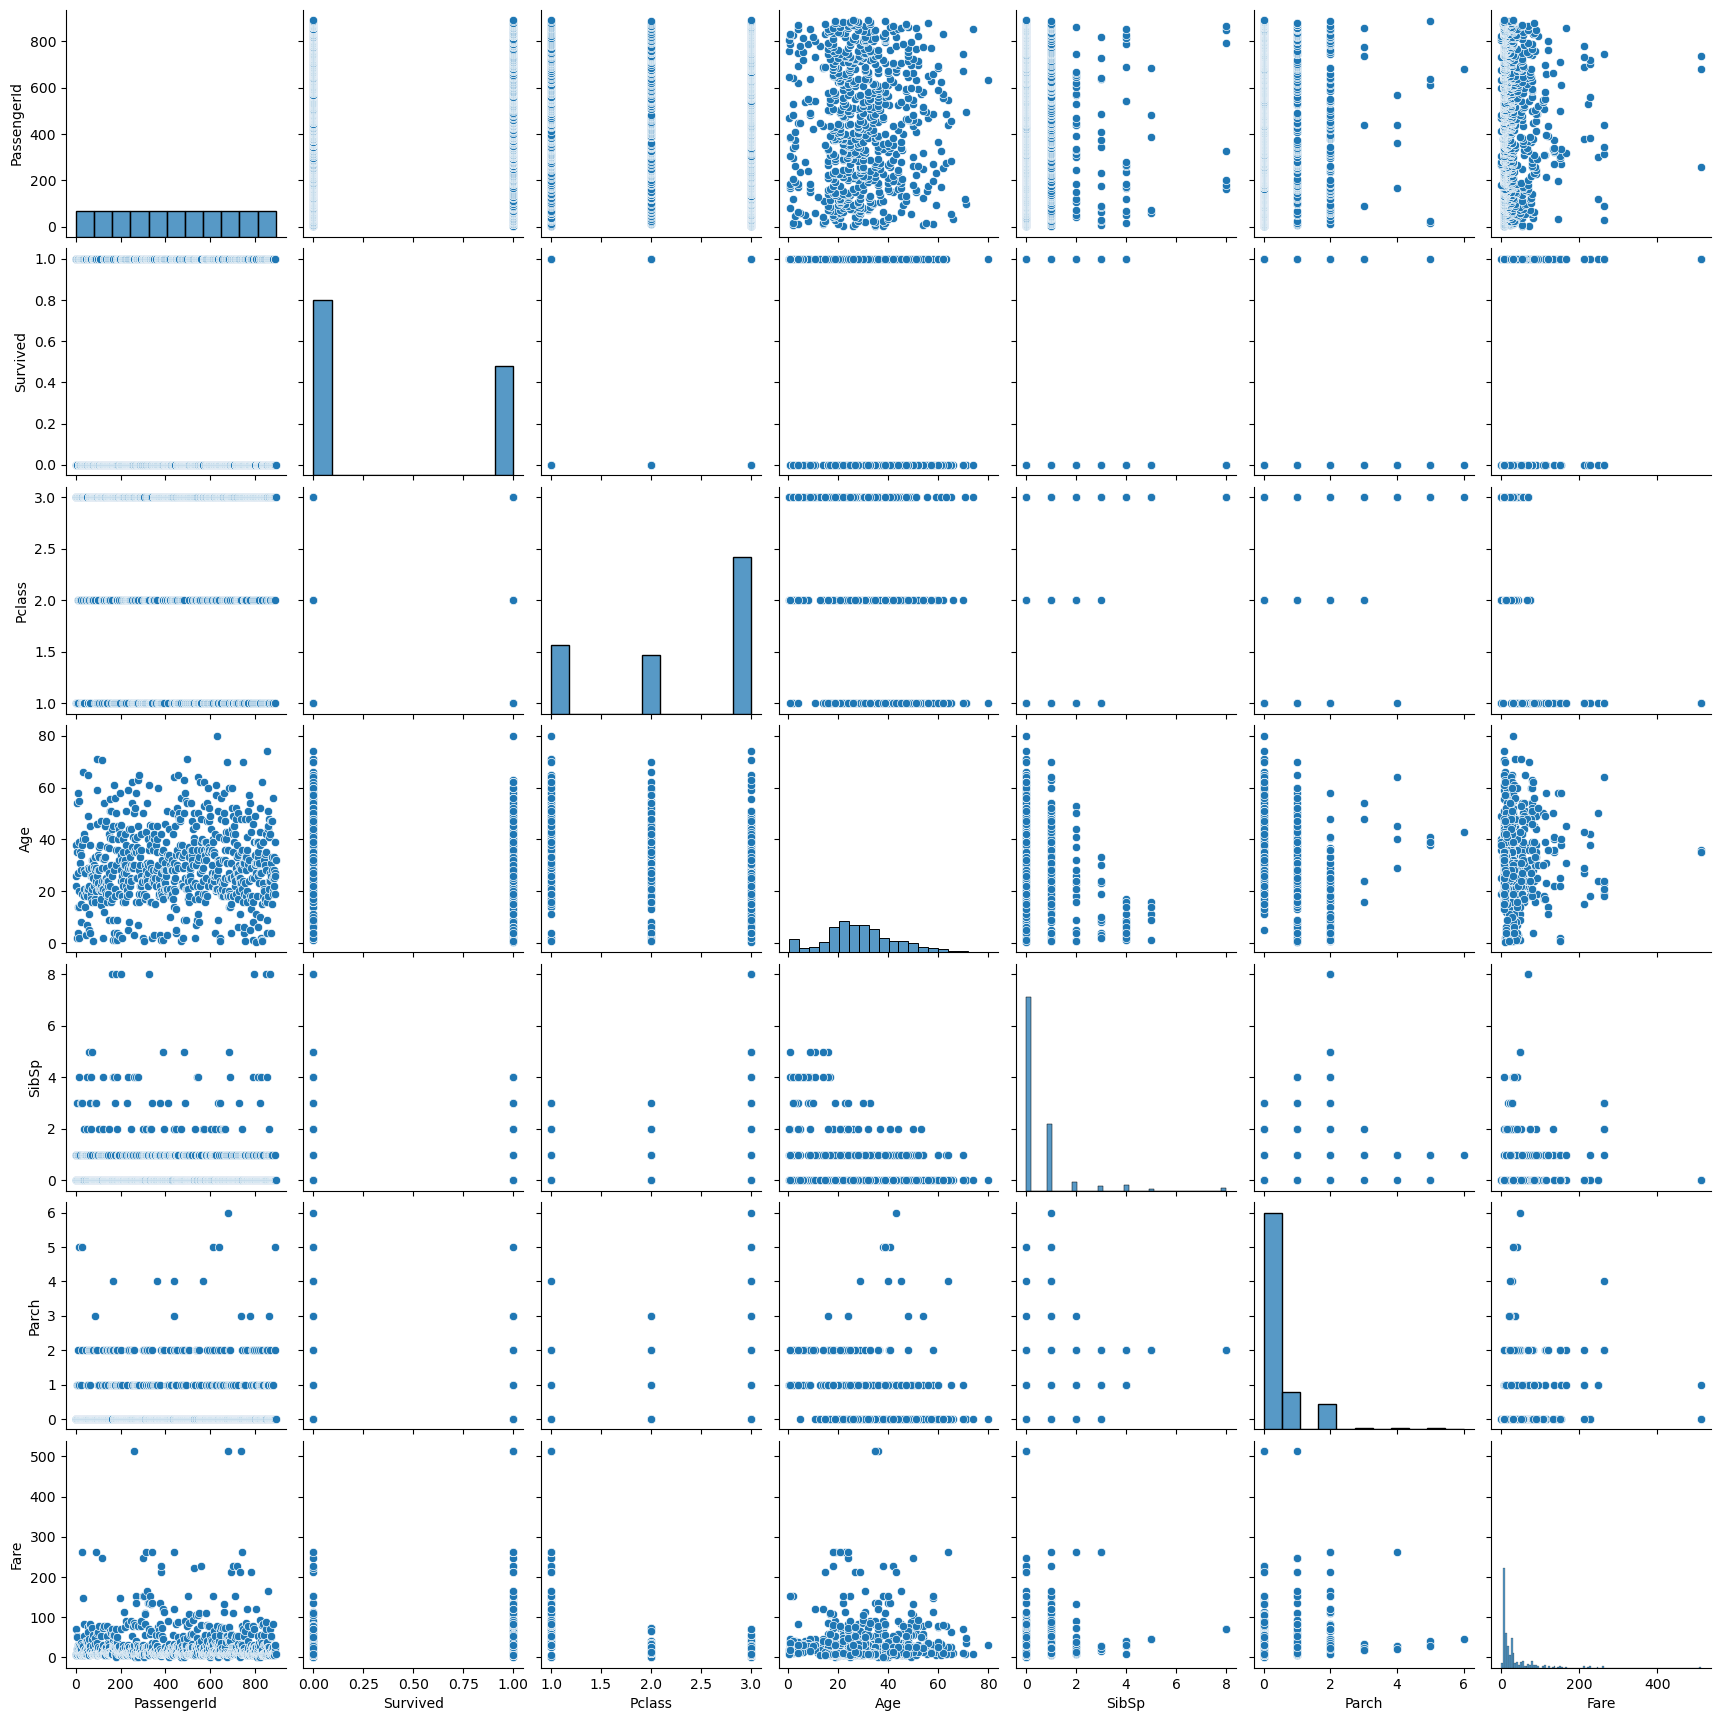

C:\Users\harsh\AppData\Local\Temp\ipykernel_19992\254954631.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


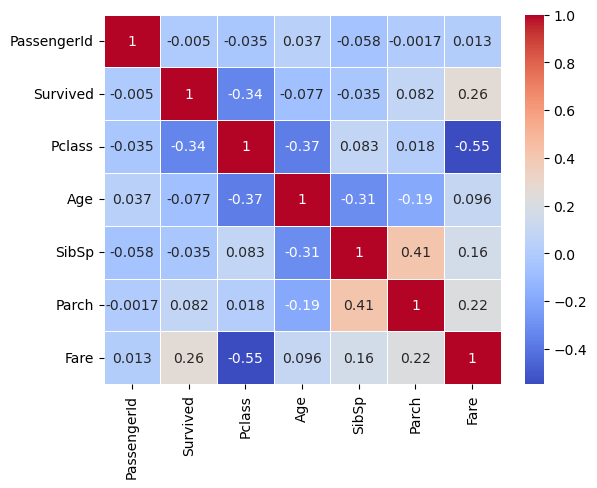

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
train_df.hist(bins=20, figsize=(20, 15))
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

# Pair plots to explore relationships
sns.pairplot(train_df.select_dtypes(include=['float64', 'int64']))
plt.show()

# Correlation matrix
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


## 2. Data Preprocessing

##### a. Handle missing values.

In [4]:
# Fill missing 'Age' values with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most common port
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing 'Fare' values in the test set with the median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop the 'Cabin' column due to a large number of missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Check if there are any remaining missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


##### b. Encode categorical variables.

In [5]:
# Convert categorical variables to dummy/indicator variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)


## 3. Model Building


##### a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Define the target variable and features
X = train_df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = train_df['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## 4. Model Evaluation
a. Evaluate the performance of the model.

Accuracy : 0.8100558659217877
Precision: 0.7857142857142857
Recall   : 0.7432432432432432
F1-score : 0.7638888888888888
ROC-AUC  : 0.8824967824967825


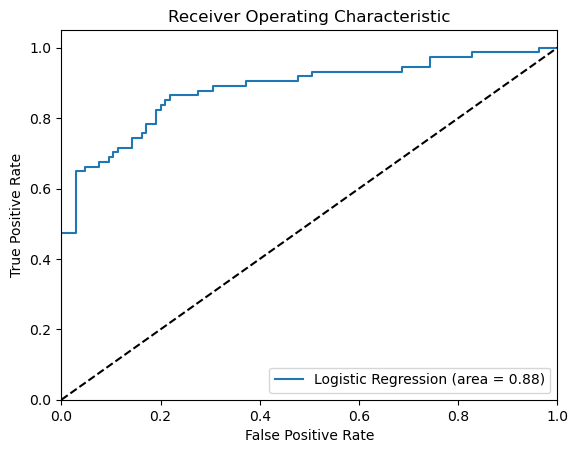

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Make predictions on the validation set
y_pred = logreg.predict(X_val)
y_pred_proba = logreg.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'Accuracy : {accuracy}')
print(f'Precision: {precision}')
print(f'Recall   : {recall}')
print(f'F1-score : {f1}')
print(f'ROC-AUC  : {roc_auc}')

# Visualize  the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## 5. Interpretation


##### a. Interpret the coefficients of the logistic regression model.

In [10]:
# Get the coefficients and feature names
coefficients = logreg.coef_[0]
features = X.columns

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)


      Feature  Coefficient
4        Fare     0.002568
1         Age    -0.030632
3       Parch    -0.108610
6  Embarked_Q    -0.112660
2       SibSp    -0.295780
7  Embarked_S    -0.400391
0      Pclass    -0.939255
5    Sex_male    -2.594731


##### b. Discuss the significance of features in predicting the target variable.

In [11]:
# Higher positive coefficients indicate features that increase the probability of survival.
# Higher negative coefficients indicate features that decrease the probability of survival.
print("Significant features in predicting survival:")
print(feature_importance)


Significant features in predicting survival:
      Feature  Coefficient
4        Fare     0.002568
1         Age    -0.030632
3       Parch    -0.108610
6  Embarked_Q    -0.112660
2       SibSp    -0.295780
7  Embarked_S    -0.400391
0      Pclass    -0.939255
5    Sex_male    -2.594731


# Interview Questions:

## 1. What is the difference between precision and recall?
Precision and recall are performance metrics used to evaluate the effectiveness of a binary classification model. They focus on the positive class and provide different insights into the model's performance.

Precision:

Definition: Precision is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives). It answers the question: "Of all the instances that the model predicted as positive, how many were actually positive?"
Formula:

Precision= True Positives (TP) / True Positives (TP)+False Positives (FP)

Interpretation: High precision indicates that the model has a low false positive rate. Precision is crucial when the cost of false positives is high (e.g., in spam detection, where marking a legitimate email as spam is undesirable).
Recall:

Definition: Recall (also known as sensitivity or true positive rate) is the ratio of true positive predictions to the total number of actual positive instances (true positives + false negatives). It answers the question: "Of all the actual positive instances, how many did the model correctly identify as positive?"
Formula:

Recall= True Positives (TP) / True Positives (TP)+False Negatives (FN)

Interpretation: High recall indicates that the model has a low false negative rate. Recall is important when the cost of false negatives is high (e.g., in medical diagnoses, where failing to detect a disease can have serious consequences).

##### Key Differences:

Precision focuses on the accuracy of the positive predictions made by the model, whereas recall focuses on the model's ability to identify all positive instances.
There is often a trade-off between precision and recall. Improving one can lead to a decrease in the other. This trade-off is often managed using the F1 score, which is the harmonic mean of precision and recall:

F1 Score=2× Precision×Recall / (Precision+Recall)


## 2. What is cross-validation, and why is it important in binary classification?
Cross-validation is a statistical technique used to evaluate the performance and generalizability of a machine learning model. It involves partitioning the data into subsets, training the model on some subsets, and validating it on the remaining subsets. The most common form is k-fold cross-validation.

Steps in k-Fold Cross-Validation:

1. Partition the Data: Divide the dataset into k approximately equal-sized folds.

2. Training and Validation:
   For each fold i (from 1 to k):
   Use fold i as the validation set.
   Use the remaining k−1 folds as the training set.
   Train the model on the training set and evaluate it on the validation set.

3. Aggregate Results: Compute the performance metric (e.g., accuracy, precision, recall, F1 score) for each fold and average these results to get an overall performance estimate.

##### Importance in Binary Classification:

1. Model Evaluation: Cross-validation provides a robust estimate of the model's performance on unseen data, helping to ensure that the model generalizes well to new data.

2. Bias-Variance Trade-off: By training and validating on different subsets of the data, cross-validation helps in identifying if the model suffers from high bias (underfitting) or high variance (overfitting).

3. Data Utilization: It allows for the effective use of the available data by ensuring that each data point is used for both training and validation, leading to a more reliable evaluation.

4. Hyperparameter Tuning: Cross-validation is often used in conjunction with grid search or randomized search for hyperparameter tuning, helping to identify the best hyperparameters that optimize the model's performance.

In summary, cross-validation is crucial for assessing the reliability and robustness of a binary classification model, ensuring that it performs well on new, unseen data and is not just tailored to the training dataset.